<font size='4' color='blue'>

<b>Probability Mass Function (PMF)</b>   

<font size='3' color='green'>
<br>    
Probability mass functions (pmf) are used to describe discrete probability distributions. 
    
</font>

</font>



In [34]:
import numpy as np
import pandas as pd
from collections import Counter as C
import matplotlib.pyplot as plt

<font size='3' color='b'>
The Probability Mass Function (PMF) gives us the probability distribution for discrete variables. <br>
<br>    
<br>
For example,counting Heads while tossing 2 coins. There are 4 distinct possible outcomes that define <br>
the entire sample space i.e. {HH, HT, TH, TT}. 
<br>
<br>
Here, we will have whole numbers, i.e.  no 1.2 or 3.75. 
<br>
<br>
In the PMF, each discrete variable is mapped to its probability. 
<br>
<br>
If we are counting the number of Heads in our trials, ideally it should give probability distribution of 0.25,
0.25 and 0.5 for 0, 1 and 2 Heads.

However, this ideal distribution does not take place in real world scenario. If we increase orders of 
magnitute, the simulated disribution approaches the theroetical PMF.
<font/>



In [42]:
SS             =  [ i+j for i in 'HT' for j in 'HT']
df             =  pd.DataFrame(SS, columns=['SampleSpace'])
df['RV']       =  df['SampleSpace'].apply(lambda x: x.count('H'))
df_pmf         =  df.RV.value_counts().to_frame().reset_index(drop=False)
df_pmf.columns =  ['RV', 'freq']
df_pmf         =  df_pmf.sort_values('RV').reset_index(drop=True)
df_pmf['prob'] =  df_pmf.freq/sum(df_pmf.freq)

In [44]:
df

,SampleSpace,RV
0,HH,2
1,HT,1
2,TH,1
3,TT,0


In [45]:
df_pmf

,RV,freq,prob
0,0,1,0.25
1,1,2,0.50
2,2,1,0.25


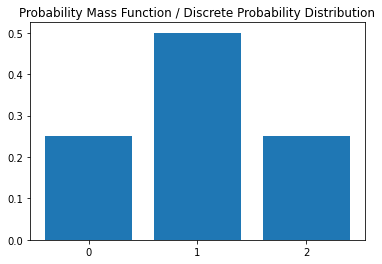

In [40]:
plt.title('Probability Mass Function / Discrete Probability Distribution')
plt.bar(df_pmf.RV, df_pmf.prob) 
plt.xticks([0, 1, 2])
plt.show()

<font size='3' and color='b'>
Notations for the Probability Mass Function of getting heads when 2 fair coins are flipped together
</font>    




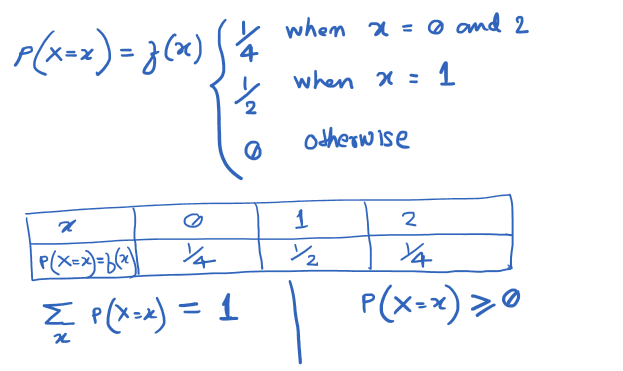

In [ ]:
P(X=x) :
    
P = probability
X = Random Variable
x = all the possible values of Random Variable

0   =  1/4  = .25
2   =  1/4  = .25
1   =  2/4  = .50
              ----
              1.00
    
    

<font size='5' color='b'>
<b>SIMULATION</b>
</font>

In [48]:
samples = np.random.choice(df.SampleSpace, 100000)
df_sim = pd.DataFrame(samples, columns=['CoinFlip'])
df_sim['RV'] = df_sim['CoinFlip'].apply(lambda x: list(x).count('H'))
df_sim.head()

,CoinFlip,RV
0,TT,0
1,HH,2
2,HH,2
3,HH,2
4,TH,1


In [49]:
df_sim_pmf = df_sim.RV.value_counts().to_frame().reset_index(drop=False)
df_sim_pmf.columns = ['RV', 'freq']
df_sim_pmf = df_sim_pmf.sort_values('RV').reset_index(drop=True)
df_sim_pmf['prob'] = df_sim_pmf.freq/sum(df_sim_pmf.freq)
df_sim_pmf

,RV,freq,prob
0,0,25022,0.25022
1,1,50157,0.50157
2,2,24821,0.24821


Probability Mass Function / Discrete Probability Distribution


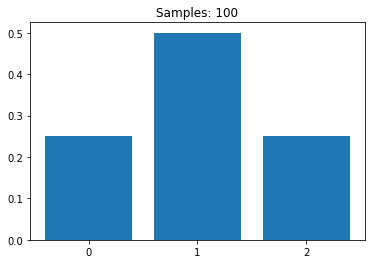

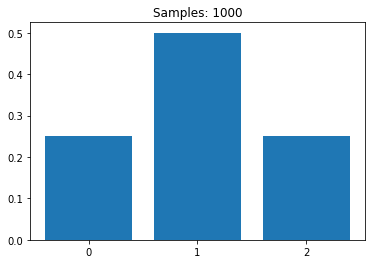

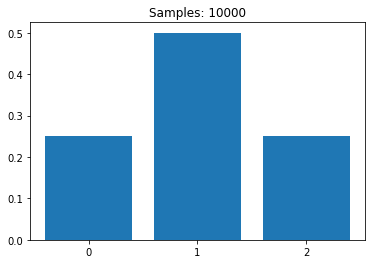

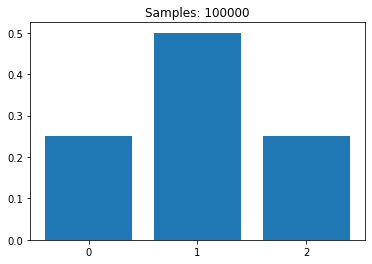

In [121]:
print('Probability Mass Function / Discrete Probability Distribution')
for stop in [100, 1000,10000, len(df_sim)] :    
    
    plt.title(f'Samples: ' + str(stop))
    plt.bar(df_sim_pmf.RV[:stop], df_sim_pmf[:stop].prob) 
    plt.xticks([0, 1, 2])
    plt.show()

In [50]:
#preparation for line chart

ind = df_sim.index + 1
df_sim['RV0'] = np.where(df_sim.RV==0, 1, 0)
df_sim['RV1'] = np.where(df_sim.RV==1, 1, 0)
df_sim['RV2'] = np.where(df_sim.RV==2, 1, 0)
df_sim['RV0_Csum'] = np.cumsum(df_sim.RV0)
df_sim['RV1_Csum'] = np.cumsum(df_sim.RV1)
df_sim['RV2_Csum'] = np.cumsum(df_sim.RV2)

In [51]:
df_sim

,CoinFlip,RV,RV0,RV1,RV2,RV0_Csum,RV1_Csum,RV2_Csum
0,TT,0,1,0,0,1,0,0
1,HH,2,0,0,1,1,0,1
2,HH,2,0,0,1,1,0,2
3,HH,2,0,0,1,1,0,3
4,TH,1,0,1,0,1,1,3
...,...,...,...,...,...,...,...,...
99995,TT,0,1,0,0,25022,50155,24819
99996,HH,2,0,0,1,25022,50155,24820
99997,HH,2,0,0,1,25022,50155,24821
99998,HT,1,0,1,0,25022,50156,24821


In [52]:
x = ind
y = list(zip(df_sim.RV0_Csum/ind,df_sim.RV1_Csum/ind,df_sim.RV2_Csum/ind))

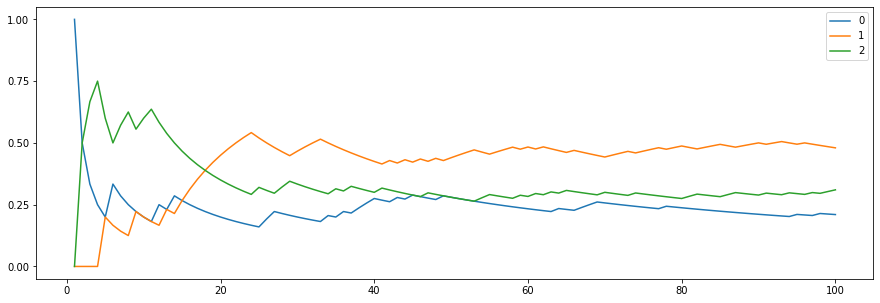

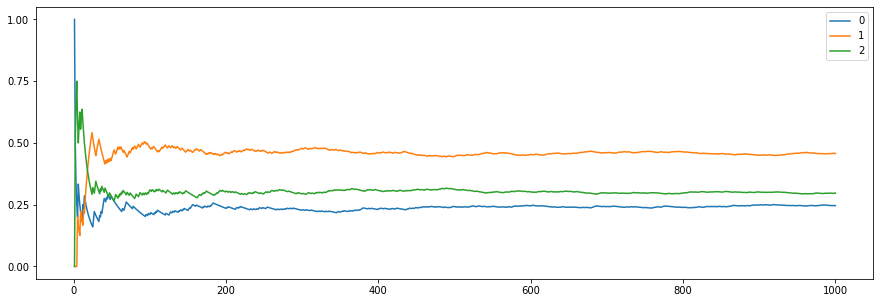

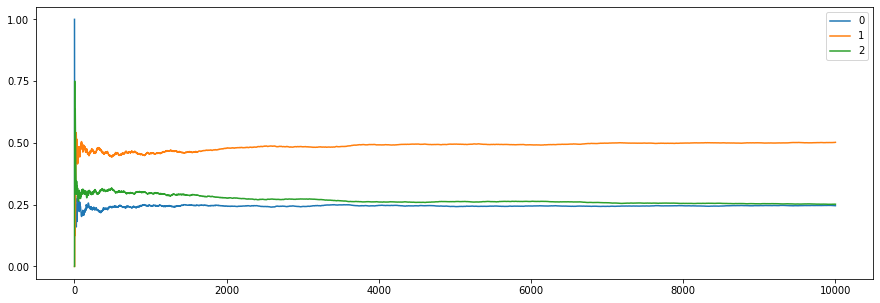

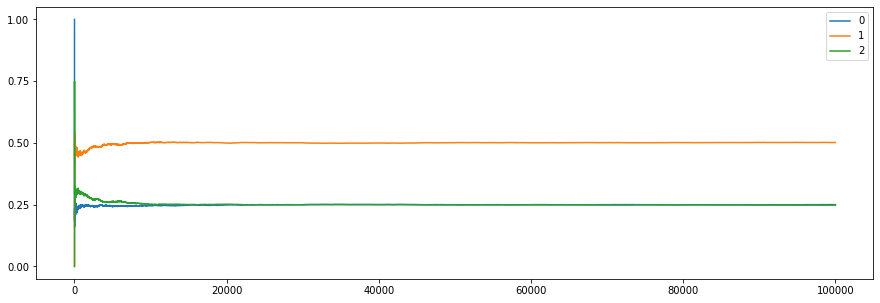

In [56]:
for stop in [100,1000,10000,len(df_sim)+1] :
    plt.figure(figsize=(15,5))
    plt.plot(x[:stop], y[:stop])
    plt.yticks([0,.25,.50,.75, 1])
    plt.legend([0, 1,2])
    plt.show()